# Running Affinity Propagation on the depolymerase dataset 
***

> Pre work : moving the files to local

### 1. Importing the modules 

> Local 

In [10]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy as sp
import subprocess
from scipy.spatial import distance
from tqdm import tqdm
from collections import Counter
import math
import datetime as dt
import matplotlib.pyplot as plt
from Bio import SeqIO, Entrez, pairwise2
from sklearn.decomposition import PCA

/home/concha-eloko/.local/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


> Remote

In [ ]:
import pandas as pd
import numpy as np
import os
import scipy as sp
import subprocess
from scipy.spatial import distance
from tqdm import tqdm
from collections import Counter
import math
import datetime as dt
from Bio import SeqIO, Entrez, pairwise2
from sklearn.decomposition import PCA

***
### 2. Loading the Dataframes 

In [1]:
#import torch
import os 
import pandas as pd
from tqdm import tqdm 

# remote :
path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"
path_similarity = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/prophage_similarity/phageboost/fastANI_20102022_out"
path_db = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/15122022_session"

esm2_depo = pd.read_csv(f"{path_project}/Dpo.0805.embeddings.ultimate.csv" , header = None, sep = "," , index_col = 0)
#esm2_depo = esm2_depo.drop([1281], axis = 1)

family_df = pd.read_csv(f"{path_similarity}/clusters_99_80.extra_clean.2004.v2.tsv", sep = "\t", header = 0)
df_info = pd.read_csv(f"{path_db}/DF_Dpo.final.1005.tsv" , sep = "\t", header =0)

# local :
#path_project = "/media/concha-eloko/Linux/PPT_clean"
#path_esm = f"{path_project}/Dpo_domains.0805.final.multi.out"
#esm2_depo = pd.read_csv(f"{path_project}/Dpo.0805.embeddings.csv" , header = None, sep = "," , index_col = 0)

/home/concha-eloko/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
esm2_depo = esm2_depo[0:1000]

,1,2,3,4,5,6,7,8,9,10,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,,,,,,,,,,,,,,,,,,,,,
ppt__2930,-0.000061,-0.017329,0.012884,0.037123,-0.123747,0.004186,-0.061367,-0.056718,-0.037215,0.017796,...,0.098806,0.012989,-0.001155,0.139749,-0.030987,0.059306,0.107041,-0.041463,-0.085581,0.114973
ppt__3300,0.004044,0.040011,-0.001234,-0.095745,-0.058056,-0.002394,0.007648,-0.059740,0.060850,0.027698,...,-0.020369,0.016287,0.062586,-0.024336,0.019276,0.069623,0.035261,-0.118962,0.035672,0.085582
ppt__1182,0.018767,0.068116,-0.009109,-0.012598,-0.107001,0.011569,-0.030943,-0.045359,0.048923,0.032816,...,0.014524,-0.024645,0.071878,0.018206,0.042790,0.088410,0.031970,-0.124592,0.070040,0.065348
ppt__3540,-0.028261,-0.047253,-0.027340,-0.052824,-0.089644,-0.023079,0.094861,0.026104,0.024001,0.089394,...,0.051728,0.005634,-0.077874,0.030336,-0.037648,0.050625,0.046142,-0.158841,-0.007670,0.034556
ppt__942,0.014863,0.028030,0.014927,-0.025997,-0.096138,0.016290,0.015008,-0.066254,0.077959,0.057165,...,0.008521,-0.019820,0.123201,-0.040306,0.030893,0.051362,0.047316,-0.102698,0.044830,0.084530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
minibatch__1547,0.005586,0.022056,0.009792,-0.036183,-0.103171,0.028859,0.023063,-0.054788,0.088813,0.042841,...,-0.002956,-0.022535,0.096137,-0.023147,0.028822,0.064896,0.046402,-0.103289,0.030545,0.080931
ppt__2719,0.008973,-0.036172,0.024278,-0.005935,-0.089380,0.007263,0.032040,-0.216239,0.071972,0.054308,...,0.066656,0.034687,-0.021256,-0.080038,-0.082435,0.010141,0.103680,-0.086817,-0.067720,0.096804
minibatch__752,-0.007236,0.063871,-0.010960,-0.047293,-0.074936,0.014609,0.007950,-0.075715,0.072990,0.066386,...,0.008046,-0.022476,0.103217,-0.005581,0.036304,0.078642,0.037012,-0.096549,0.055382,0.070137


***
# 3. Affinity propagation


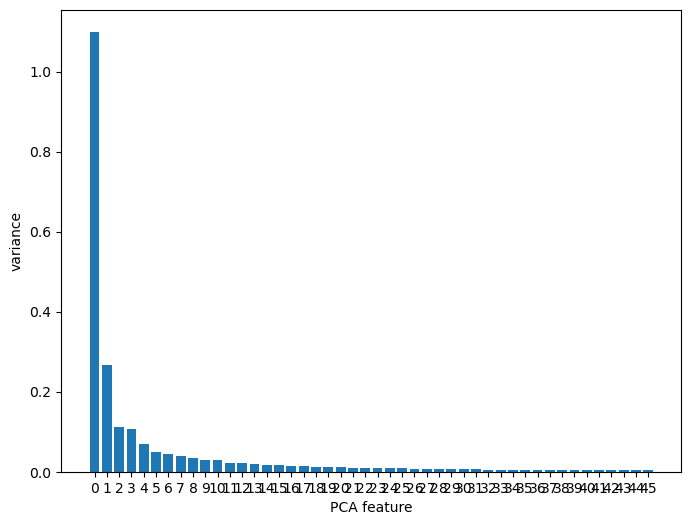

In [30]:
pca = PCA(.95)
pca_scaled_x = pca.fit_transform(esm2_depo)


    # Writing the figures :
features = range(pca.n_components_)
plt.figure(figsize=(8, 6))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
#plt.savefig(f"{path_fig}/PCA.features.jpeg")
plt.show()

## b. Affinity Propagation 

In [30]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

pref = -0.04
af = AffinityPropagation(damping=0.95, preference=pref, random_state=123, max_iter=1000,verbose=True).fit(esm2_depo)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
n_clusters_

Converged after 738 iterations.


890

In [25]:
import json

dico_df = {"Dpo" : esm2_depo.index , "Label" : labels}
df_results = pd.DataFrame(dico_df)

dico_cluster = {}
for index , row in df_results.iterrows() :
    if row["Label"] not in dico_cluster :
        tmp_list = []
        tmp_list.append(row["Dpo"])
        dico_cluster[row["Label"]] = tmp_list
    else :
        dico_cluster[row["Label"]].append(row["Dpo"])
        
with open(f"{path_project}/dico_cluster.ultimate.pref_{pref}.ultimate.json", "w") as outfile:
    json.dump(dico_cluster, outfile)
    

> The prophage vs Dpo DF

In [27]:
dico_prophage_id = {}
for Dpo_label , Dpo_list in tqdm(dico_cluster.items()) :
    prophages_carrying = set()
    for _,dpo in enumerate(Dpo_list) :
        prophages_df = df_info[df_info["index"] == dpo]
        for phage in prophages_df["Phage"].to_list() :
            family = family_df[family_df["prophage"] == f"{phage}.fasta"]["prophage_id"].values[0]
            prophages_carrying.add(family)
    dico_prophage_id[f"Dpo__{Dpo_label}"] = prophages_carrying

  0%|                                                  | 0/1359 [00:00<?, ?it/s]


NameError: name 'df_info' is not defined

In [ ]:
def build_dataframe(dico):
    # First, let's get a list of all unique prophages across all Dpo's.
    prophages = set(prophage for prophages in dico.values() for prophage in prophages)
    # Now we'll create a list of lists that represents our matrix.
    # Each sublist will be a row in the matrix and represents one prophage.
    # The entries in the sublist will be 1 if the prophage is in the Dpo, and 0 if not.
    matrix = [[1 if prophage in dico[dpo] else 0 for dpo in dico.keys()] for prophage in prophages]
    # Now we'll convert the matrix to a DataFrame.
    df = pd.DataFrame(matrix, index=prophages, columns=dico.keys())
    return df

In [ ]:
df = build_dataframe(dico_prophage_id)
df.sort_index(inplace = True, ascending=True)
df.to_csv(f"{path_project}/DF_optimization/tmp/prophage_Dpo.pref_{pref}.ultimate.csv", sep = "\t")

> The prophage vs Strains DF

In [ ]:
dico_prophage_strains = {}
for prophage_id,row in tqdm(df.iterrows()) :
    strains = set()
    phages = family_df[family_df["prophage_id"] == prophage_id]
    for phage in phages["prophage"].to_list() :
        strains.add(phage.split("__")[0])
    dico_prophage_strains[prophage_id] = strains

In [ ]:
def dict_to_dataframe(input_dict):
    # Create a set of all unique strains
    all_strains = set().union(*input_dict.values())
    # Initialize a nested dictionary with zeros
    data = {prophage: {strain: 0 for strain in all_strains} for prophage in input_dict}
    # Iterate over prophages and strains
    for prophage, strains in input_dict.items():
        for strain in strains:
            data[prophage][strain] = 1
    # Convert nested dictionary to DataFrame
    df = pd.DataFrame.from_dict(data, orient='index')
    # Convert to int
    df = df.astype(int)
    return df

In [ ]:
df_2 = dict_to_dataframe(dico_prophage_strains)
df_2.sort_index(inplace = True, ascending=True)
df_2.to_csv(f"{path_project}/prophage_strains.pref_{pref}.ultimate.csv", sep = "\t")

> the prophage and the K_types

In [ ]:
dico_prophage_k_types = {}
for prophage_id,row in tqdm(df.iterrows()) :
    ktypes = set()
    phages = family_df[family_df["prophage_id"] == prophage_id]
    saved_ones = set()
    for phage in phages["prophage"].to_list() :
        try : 
            K_type = df_info[df_info["Phage"] == phage.split(".fasta")[0]]["KL_type_LCA"].values[0]
            if len(K_type.split("|")) < 4 :
                ktypes.add(K_type)
            else :
                saved_ones.add(K_type)
        except Exception as e :
            pass
    if len(ktypes) == 0 :
        print("something is wrong here :",prophage_id)
        if len(saved_ones) > 0:
            ktypes = saved_ones
            print(saved_ones)
        else :
            print("Alright, can't be saved")
    dico_prophage_k_types[prophage_id] = ktypes


In [ ]:
def dict_to_dataframe(input_dict):
    # Create a set of all unique strains
    all_strains = set().union(*input_dict.values())
    # Initialize a nested dictionary with zeros
    data = {prophage: {strain: 0 for strain in all_strains} for prophage in input_dict}
    # Iterate over prophages and strains
    for prophage, strains in input_dict.items():
        for strain in strains:
            data[prophage][strain] = 1
    # Convert nested dictionary to DataFrame
    df = pd.DataFrame.from_dict(data, orient='index')
    # Convert to int
    df = df.astype(int)
    return df

In [ ]:
df_3 = dict_to_dataframe(dico_prophage_k_types)
df_3.sort_index(inplace = True, ascending=True)
df_3.to_csv(f"{path_project}/DF_optimization/prophage_K_types.ultimate.csv", sep = "\t")

***
# Make a RF for each K-type

In [8]:
import os 
import pandas as pd
from tqdm import tqdm 
from multiprocessing.pool import ThreadPool

# remote :
path_project = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023"
path_similarity = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/prophage_similarity/phageboost/fastANI_20102022_out"
path_db = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/15122022_session"
path_DF = f"{path_project}/DF_Rafa"

prophage_dpo_df = pd.read_csv(f"{path_DF}/prophage_Dpo.pref_-0.04.csv", header = 0 , sep = "\t" , index_col = 0)
prophage_ktype_df = pd.read_csv(f"{path_DF}/prophage_K_types.pref_-0.01.csv", header = 0 , sep = "\t", index_col = 0) 


FileNotFoundError: [Errno 2] No such file or directory: '/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/DF_Rafa/prophage_Dpo.pref_-0.04.csv'

In [7]:
prophage_dpo_df

for phage,row in prophage_dpo_df.iterrows() :
    if row.sum() == 0 :
        print(phage)
    else :
        print(row.sum())

NameError: name 'prophage_dpo_df' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import fisher_exact
import pandas as pd
import numpy as np
from collections import Counter

def fit_rf_model_random_search(label):
    label_series = prophage_ktype_df[label]
    dic_count = dict(Counter(label_series))
    if 1 in dic_count:
        n_infection = dic_count[1]
        df = prophage_dpo_df
        n_iter=3
        X_train, X_test, y_train, y_test = train_test_split(df, label_series, test_size=0.2, random_state=42)
        param_grid = {
            'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800]
        }
        rf = RandomForestClassifier()
        rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                       n_iter=n_iter, cv=3, verbose=2, random_state=42, n_jobs=-1)
        rf_random.fit(X_train, y_train)
        # Print the best parameters from the Randomized Search
        predictions = rf_random.predict(X_test)
        report = classification_report(y_test, predictions, output_dict=True)
        # Extract relevant metrics
        try : 
            precision, recall, f1_score = report['1']['precision'], report['1']['recall'], report['1']['f1-score']
            # Calculate p-values for features
            significant_features = []
            for feature in df.columns:
                contingency_table = pd.crosstab(df[feature], label_series)
                _, p_value = fisher_exact(contingency_table)
                if p_value < 0.05:
                    significant_features.append(feature)
            with open(f"{path_DF}/RF_results.1605.tsv", "a+") as outfile :
                outfile.write(f"{label}\t{n_infection}\t{f1_score}\t{precision}\t{recall}\t{len(significant_features)}\t{','.join(significant_features)}\n")
        except Exception as e :
            print(e, label, n_infection)


In [ ]:
labels = list(prophage_ktype_df.columns)
if __name__ == '__main__':
    with ThreadPool(5) as pool:
        pool.map(fit_rf_model_random_search,labels)


In [ ]:
#!/bin/bash
#BATCH --job-name=RF__
#SBATCH --qos=short
#SBATCH --ntasks=1 
#SBATCH --cpus-per-task=30 
#SBATCH --mem=20gb 
#SBATCH --time=1-00:00:00 
#SBATCH --output=RF__%j.log 

source /storage/apps/ANACONDA/anaconda3/etc/profile.d/conda.sh
conda activate embeddings


python /home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/script_files/RF_1505.py

***
# Plot the distribution of F1 score

In [ ]:
outfile.write(f"{label}\t{n_infection}\t{f1_score}\t{precision}\t{recall}\t{len(significant_features)}\t{','.join(significant_features)}\n")


In [3]:
import pandas as pd 
import os 
path_project = "/media/concha-eloko/Linux/PPT_clean"
df_RF = pd.read_csv(f"{path_project}/RF_results.1605.tsv", names = ["KL_type","Number_infection","F1_score","Precision","Recall","N_Dpos","Dpos_list"], sep = "\t")

In [4]:
df_RF

,KL_type,Number_infection,F1_score,Precision,Recall,N_Dpos,Dpos_list
0,KL52|KL2,1,0.000000,0.00,0.000000,2,"Dpo__169,Dpo__425"
1,KL130,1,0.000000,0.00,0.000000,1,Dpo__247
2,KL17|KL106,2,0.000000,0.00,0.000000,19,"Dpo__57,Dpo__27,Dpo__687,Dpo__49,Dpo__302,Dpo_..."
3,KL24|KL48,1,0.000000,0.00,0.000000,1,Dpo__36
4,KL64|KL111,4,0.000000,0.00,0.000000,8,"Dpo__448,Dpo__601,Dpo__438,Dpo__190,Dpo__709,D..."
...,...,...,...,...,...,...,...
99,KL29,18,0.222222,1.00,0.125000,19,"Dpo__120,Dpo__145,Dpo__161,Dpo__173,Dpo__199,D..."
100,KL2,84,0.545455,0.75,0.428571,34,"Dpo__9,Dpo__678,Dpo__649,Dpo__27,Dpo__853,Dpo_..."
101,KL53,13,0.000000,0.00,0.000000,20,"Dpo__212,Dpo__38,Dpo__188,Dpo__99,Dpo__129,Dpo..."
102,KL14,42,1.000000,1.00,1.000000,44,"Dpo__448,Dpo__687,Dpo__329,Dpo__323,Dpo__352,D..."


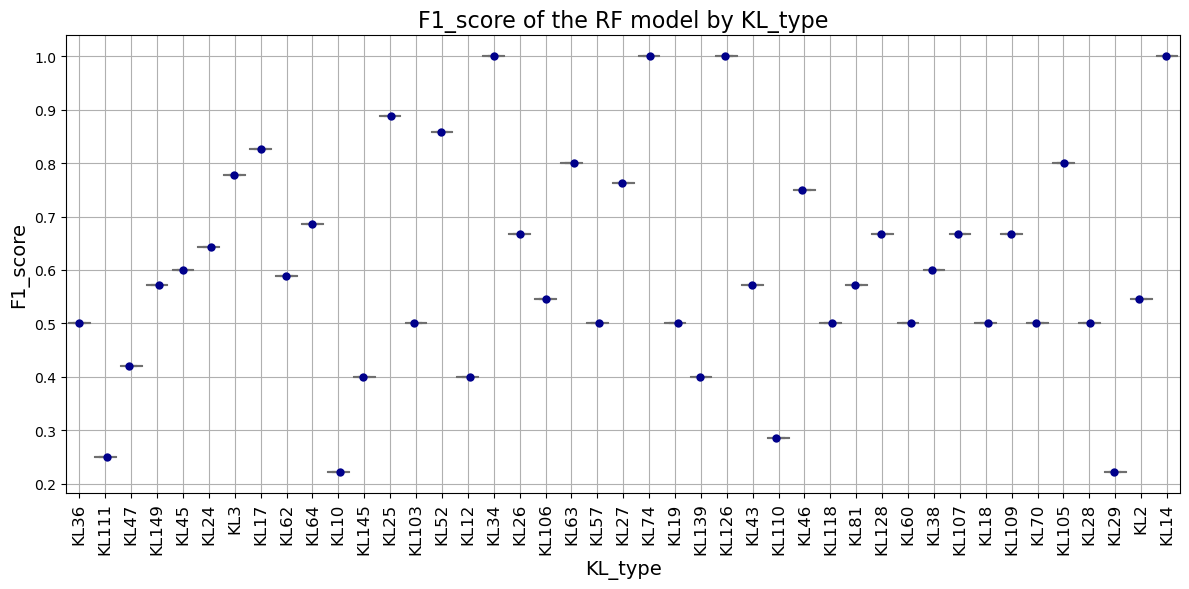

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
df_filtered = df_RF[df_RF['F1_score'] != 0]

plt.figure(figsize=(12, 6))

# Use stripplot to add individual data points
sns.boxplot(x='KL_type', y='F1_score', data=df_filtered, color='skyblue')
sns.stripplot(x='KL_type', y='F1_score', data=df_filtered, color='darkblue', size=6, jitter=True)

plt.title('F1_score of the RF model by KL_type', fontsize=16)
plt.xlabel('KL_type', fontsize=14)
plt.ylabel('F1_score', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotates x-axis labels to be vertical

# Make the grid visible
plt.grid(True)

plt.tight_layout()
plt.savefig(f"{path_project}/F1_score.KLtype.RF.png", dpi =300)
plt.show()

In [5]:
correlation = df_RF['Number_infection'].corr(df_RF['F1_score'])
print(f'The correlation between Number_infection and F1_score is {correlation}')

The correlation between Number_infection and F1_score is 0.5551281661551912


In [6]:
correlation = df_RF['N_Dpos'].corr(df_RF['F1_score'])
print(f'The correlation between Number_infection and F1_score is {correlation}')

The correlation between Number_infection and F1_score is 0.3886957990464831


> How many prophages without a Dpo ?

In [ ]:
import os 
import pandas as pd

path_df = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/15122022_session"

df_f = pd.read_csv(f"{path_df}/DF_Dpo.final.1005.tsv", header = 0, sep = "\t") 

phages = df_f.drop_duplicates(subset = ["Phage"], keep = "first")

